In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [9]:
# Specify the file path
#file_path = r'D:\data analytics\Case study 3 - papaya\DAY#3 - Unsupervised ML & Use Cases\Use Case Dataset\Case study 3 - papaya\Use Case #3.csv'
# Load the data into a DataFrame
data = pd.read_csv(r'D:\data analytics\Case study 3 - papaya\DAY#3 - Unsupervised ML & Use Cases\Use Case Dataset\RETAIL STORE\Use Case #3.csv')


In [10]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [11]:
# Convert the 'Date' column to a datetime object
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')




In [12]:
# Extract the date portion in DD-MM-YYYY format
data['Formatted_Date'] = data['Date'].dt.strftime('%d-%m-%Y')


In [13]:
# Display the first few rows of the dataset
data.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Formatted_Date
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,05-02-2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12-02-2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19-02-2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26-02-2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,05-03-2010


In [31]:
# Split the data into features (X) and target (y)
X = data[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = data['Weekly_Sales']

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Create a Linear Regression model
lr_model = LinearRegression()

In [34]:
# Train the model on the training data
lr_model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Make predictions on the test data
y_pred = lr_model.predict(X_test)


In [36]:
# Calculate model accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)


In [37]:
# Print the accuracy metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Mean Absolute Error (MAE): 475432.53
Mean Squared Error (MSE): 316554511405.11
Root Mean Squared Error (RMSE): 562631.77
R-squared (R2) Score: 0.02


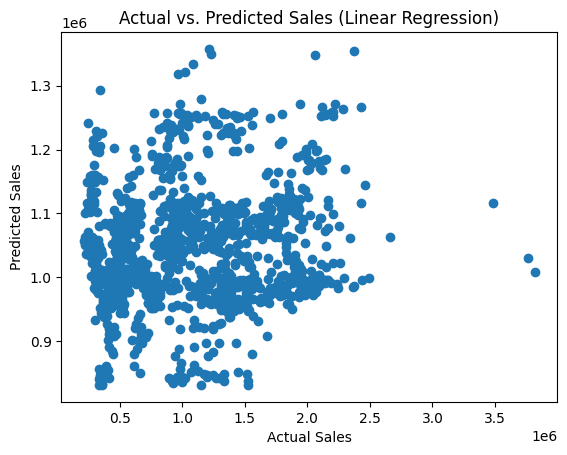

In [38]:
# Plot actual vs. predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Linear Regression)')
plt.show()


In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [41]:
# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [42]:
# Make predictions on the test data
y_pred = rf_model.predict(X_test)

In [43]:
# Calculate model accuracy metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

In [44]:
# Print the accuracy metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.2f}')

Mean Absolute Error (MAE): 383451.56
Mean Squared Error (MSE): 287424521834.41
Root Mean Squared Error (RMSE): 536119.88
R-squared (R2) Score: 0.11


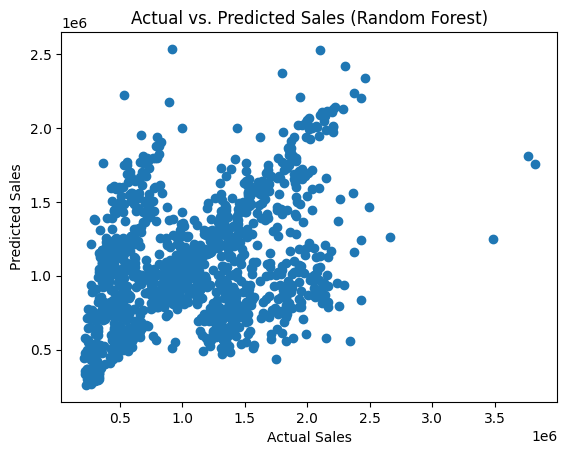

In [46]:
# Plot actual vs. predicted sales
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (Random Forest)')
plt.show()